In [40]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.titlesize'] = 26
plt.rcParams['axes.labelsize']=18
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
plt.rcParams['legend.fontsize']=18
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10
plt.rcParams['axes.labelsize'] = 22

In [41]:
import numpy as np
import pickle

from DDAS import MakeReal
from AntennaSelection import generateLROASdata, generateOASdata, generateSASdata, calculateBERwithAS
from symbols import SymbolGenerator, MLdecoder
from channels import KroneckerRayleighChannelMIMO

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.base import clone

In [3]:
import re

def removeSpaces(file):
    r = open(file, 'r')
    
    contents = r.read()
    contents = contents.replace(" ", "")
    contents = contents.replace("\t","\n")
    contents = contents.replace('i', 'j')
    
    string = file + "_processed.txt"
    o = open(string, 'w')
    
    o.write(contents)
    #for s in contents:
    #    o.write(s)
    
    r.close()
    o.close()

In [4]:
#removeSpaces('./classification_data/test1/test13')

In [5]:
def readComplexFile(file):
    r = open(file, 'r')
    contents = r.read()
    contents = contents.split("\n")
    print(len(contents))
    print(contents[:10])
    c = np.array(len(contents))
    for i in range(len(contents)):
        try:
            c[i] = complex(contents[i])
        except ValueError:
            print(contents[i])
    return c

In [37]:
test1 = np.loadtxt('./classification_data/test1_processed.txt', dtype=complex)
test11 = np.loadtxt('./classification_data/test11_processed.txt', dtype=complex)
test12 = np.loadtxt('./classification_data/test12_processed.txt', dtype=complex)
test13 = np.loadtxt('./classification_data/test13_processed.txt', dtype=complex)
test2 = np.loadtxt('./classification_data/test2_processed.txt', dtype=complex)
test21 = np.loadtxt('./classification_data/test21_processed.txt', dtype=complex)
test22 = np.loadtxt('./classification_data/test22_processed.txt', dtype=complex)
test23 = np.loadtxt('./classification_data/test23_processed.txt', dtype=complex)
test3 = np.loadtxt('./classification_data/test3_processed.txt', dtype=complex)
test31 = np.loadtxt('./classification_data/test31_processed.txt', dtype=complex)
test32 = np.loadtxt('./classification_data/test32_processed.txt', dtype=complex)
test33 = np.loadtxt('./classification_data/test33_processed.txt', dtype=complex)
test4 = np.loadtxt('./classification_data/test4_processed.txt', dtype=complex)
test41 = np.loadtxt('./classification_data/test41_processed.txt', dtype=complex)
test42 = np.loadtxt('./classification_data/test42_processed.txt', dtype=complex)
test5 = np.loadtxt('./classification_data/test5_processed.txt', dtype=complex)
test51 = np.loadtxt('./classification_data/test51_processed.txt', dtype=complex)
test52 = np.loadtxt('./classification_data/test52_processed.txt', dtype=complex)
test6 = np.loadtxt('./classification_data/test6_processed.txt', dtype=complex)
test61 = np.loadtxt('./classification_data/test61_processed.txt', dtype=complex)
test62 = np.loadtxt('./classification_data/test62_processed.txt', dtype=complex)
test7 = np.loadtxt('./classification_data/test7_processed.txt', dtype=complex)
test71 = np.loadtxt('./classification_data/test71_processed.txt', dtype=complex)
test72 = np.loadtxt('./classification_data/test72_processed.txt', dtype=complex)

In [7]:
def breakData(x, n):
    l = len(x);
    steps = l//n
    s = x.shape
    y = np.zeros((steps,n),dtype = complex)
    for i in range(steps-1):
        y[i-(1000//n)] = x[i*n:(i+1)*n]
    
    return y

In [8]:
def cleanData(x, Nclean, Nleave):
    while((i+1) < len(x)):
        x = x[i*Nleave:(i+1)Nleave, (i+1)Nleave + 2*Nclean: ]
        i += 1

SyntaxError: invalid syntax (<ipython-input-8-8d54539a144c>, line 3)

In [38]:
N = 200

plt1 = test1
plt2 = test2
plt3 = test3
plt4 = test4
plt5 = test5
plt6 = test6
plt7 = test7


test1 = breakData(test1, N)
test11 = breakData(test11, N)
test12 = breakData(test12, N)
test13 = breakData(test13, N)
test2 = breakData(test2, N)
test21 = breakData(test21, N)
test22 = breakData(test22, N)
test23 = breakData(test23, N)
test3 = breakData(test3, N)
test31 = breakData(test31, N)
test32 = breakData(test32, N)
test33 = breakData(test33, N)
test4 = breakData(test4, N)
test41 = breakData(test41, N)
test42 = breakData(test42, N)
test5 = breakData(test5, N)
test51 = breakData(test51, N)
test52 = breakData(test52, N)
test6 = breakData(test6, N)
test61 = breakData(test61, N)
test62 = breakData(test62, N)
test7 = breakData(test7, N)
test71 = breakData(test71, N)
test72 = breakData(test72, N)

In [10]:
test72.shape

(30000, 200)

In [11]:
data_prep_pipeline = Pipeline([
    ('toReal', MakeReal(RealPart = False, ImaginaryPart=False, magnitude = True, Phase = True)),
    ('stdScaler', StandardScaler()),
])

In [12]:
x10 = data_prep_pipeline.fit_transform(test1)
x11 = data_prep_pipeline.fit_transform(test11)
x12 = data_prep_pipeline.fit_transform(test12)
x13 = data_prep_pipeline.fit_transform(test13)
x20 = data_prep_pipeline.fit_transform(test2)
x21 = data_prep_pipeline.fit_transform(test21)
x22 = data_prep_pipeline.fit_transform(test22)
x23 = data_prep_pipeline.fit_transform(test23)
x30 = data_prep_pipeline.fit_transform(test3)
x31 = data_prep_pipeline.fit_transform(test31)
x32 = data_prep_pipeline.fit_transform(test32)
x33 = data_prep_pipeline.fit_transform(test33)
x40 = data_prep_pipeline.fit_transform(test4)
x41 = data_prep_pipeline.fit_transform(test41)
x42 = data_prep_pipeline.fit_transform(test42)
x50 = data_prep_pipeline.fit_transform(test5)
x51 = data_prep_pipeline.fit_transform(test51)
x52 = data_prep_pipeline.fit_transform(test52)
x60 = data_prep_pipeline.fit_transform(test6)
x61 = data_prep_pipeline.fit_transform(test61)
x62 = data_prep_pipeline.fit_transform(test62)
x70 = data_prep_pipeline.fit_transform(test7)
x71 = data_prep_pipeline.fit_transform(test71)
x72 = data_prep_pipeline.fit_transform(test72)

In [13]:
del test1
del test11
del test12
del test13

del test2
del test21
del test22
del test23

del test3
del test31
del test32
del test33

del test4
del test41
del test42

del test5
del test51
del test52

del test6
del test61
del test62

del test7
del test71
del test72


In [14]:
x10.shape

(30000, 400)

In [15]:
x10[1].shape

(400,)

In [16]:
s = x10.shape

N = s[0]
y10 = np.ones(N)
y11 = np.ones(N)
y12 = np.ones(N)
y13 = np.ones(N)
y20 = np.ones(N)
y21 = np.ones(N)
y22 = np.ones(N)
y23 = np.ones(N)
y30 = np.ones(N)
y31 = np.ones(N)
y32 = np.ones(N)
y33 = np.ones(N)
y40 = np.zeros(N)
y41 = np.zeros(N)
y42 = np.zeros(N)
y50 = np.zeros(N)
y51 = np.zeros(N)
y52 = np.zeros(N)
y60 = np.zeros(N)
y61 = np.zeros(N)
y62 = np.zeros(N)
y70 = np.zeros(N)
y71 = np.zeros(N)
y72 = np.zeros(N)

In [17]:
X = np.concatenate((x10,x11,x12,x13,x20,x21,x22,x23,x30,x31,x32,x33,x40,x41,x42,x50,x51,x52,x60,x61,x62,x70,x71,x72))
y = np.concatenate((y10,y11,y12,y13,y20,y21,y22,y23,y30,y31,y32,y33,y40,y41,y42,y50,y51,y52,y60,y61,y62,y70,y71,y72))

In [18]:
p = np.random.permutation(len(X))
X = X[p]
y = y[p]

In [19]:
N = 5000

Xtest = X[len(X)-N:]
Xtrain = X[:len(X)-N]

ytest = y[len(y)-N:]
ytrain = y[:len(y)-N]

In [20]:
del X, y

In [21]:
mlpc_clf = MLPClassifier(max_iter=1000)

In [22]:
mlpc_clf.fit(Xtrain,ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [23]:
print(mlpc_clf.score(Xtest,ytest))

0.95


In [ ]:
svc_clf = SVC()
knn_clf = KNeighborsClassifier(n_neighbors=51)

In [ ]:
knn_clf.fit(Xtrain[:10000],ytrain[:10000])
knn_clf.score(Xtest,ytest)

In [ ]:
svc_clf.fit(Xtrain[:10000], ytrain[:10000])
svc_clf.score(Xtest,ytest)

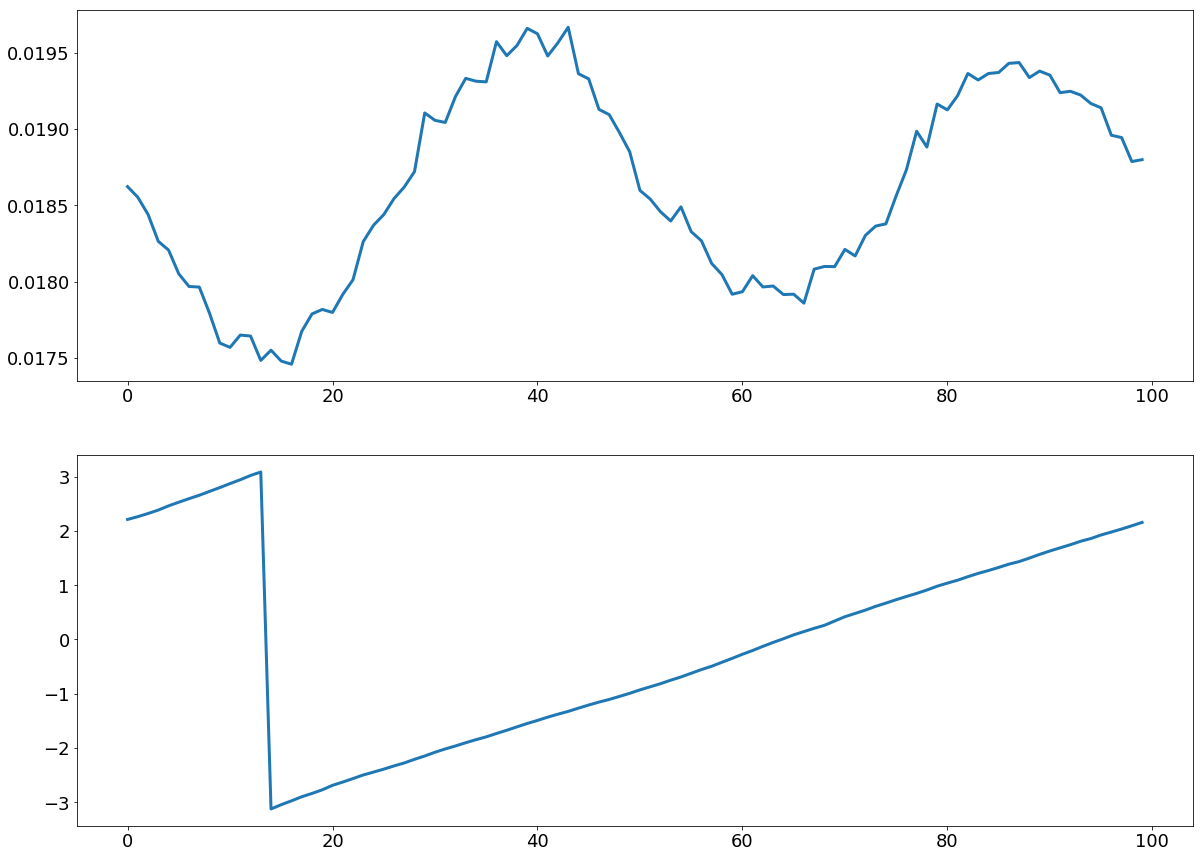

In [24]:
start = 17000
N = 100

plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.plot(np.abs(plt1[start:start+N]))

plt.subplot(2,1,2)
plt.plot(np.angle(plt1[start:start+N]))

plt.show()

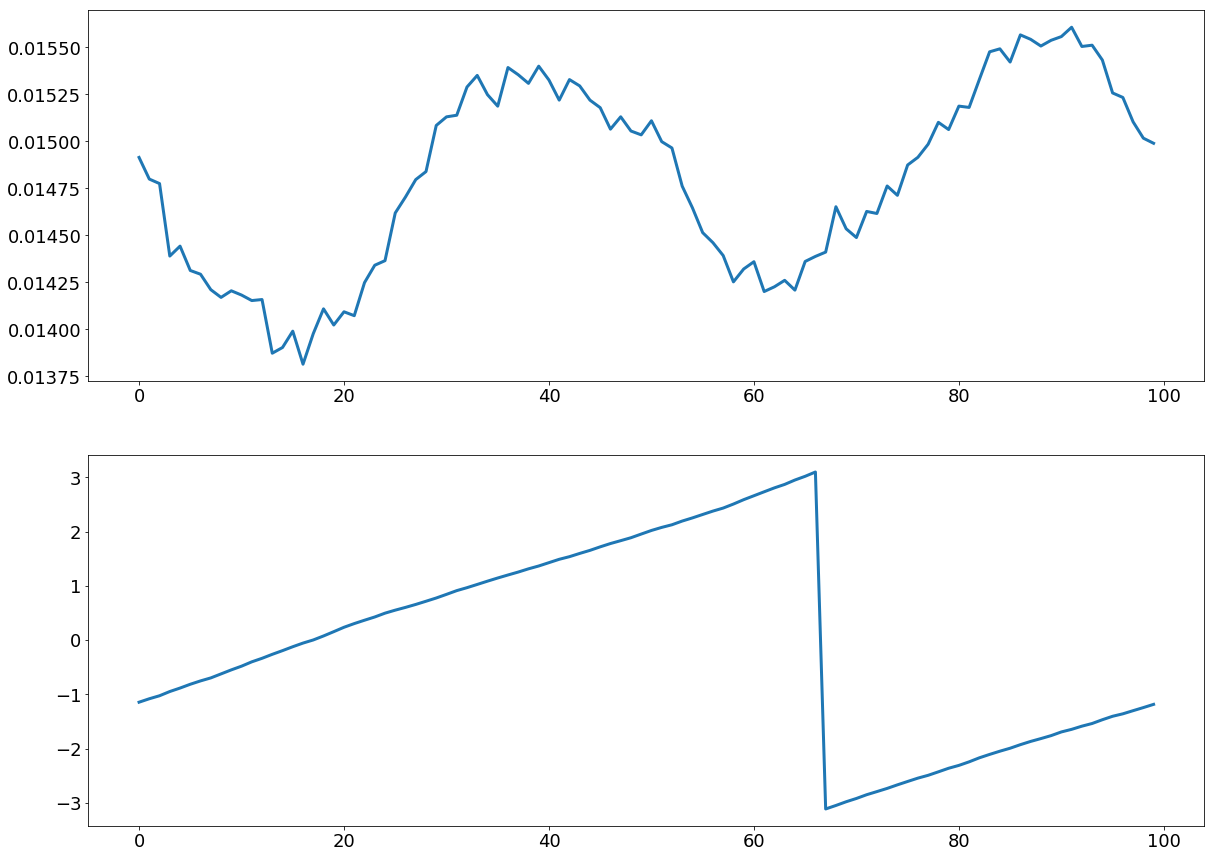

In [25]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.plot(np.abs(plt2[start:start+N]))

plt.subplot(2,1,2)
plt.plot(np.angle(plt2[start:start+N]))

plt.show()

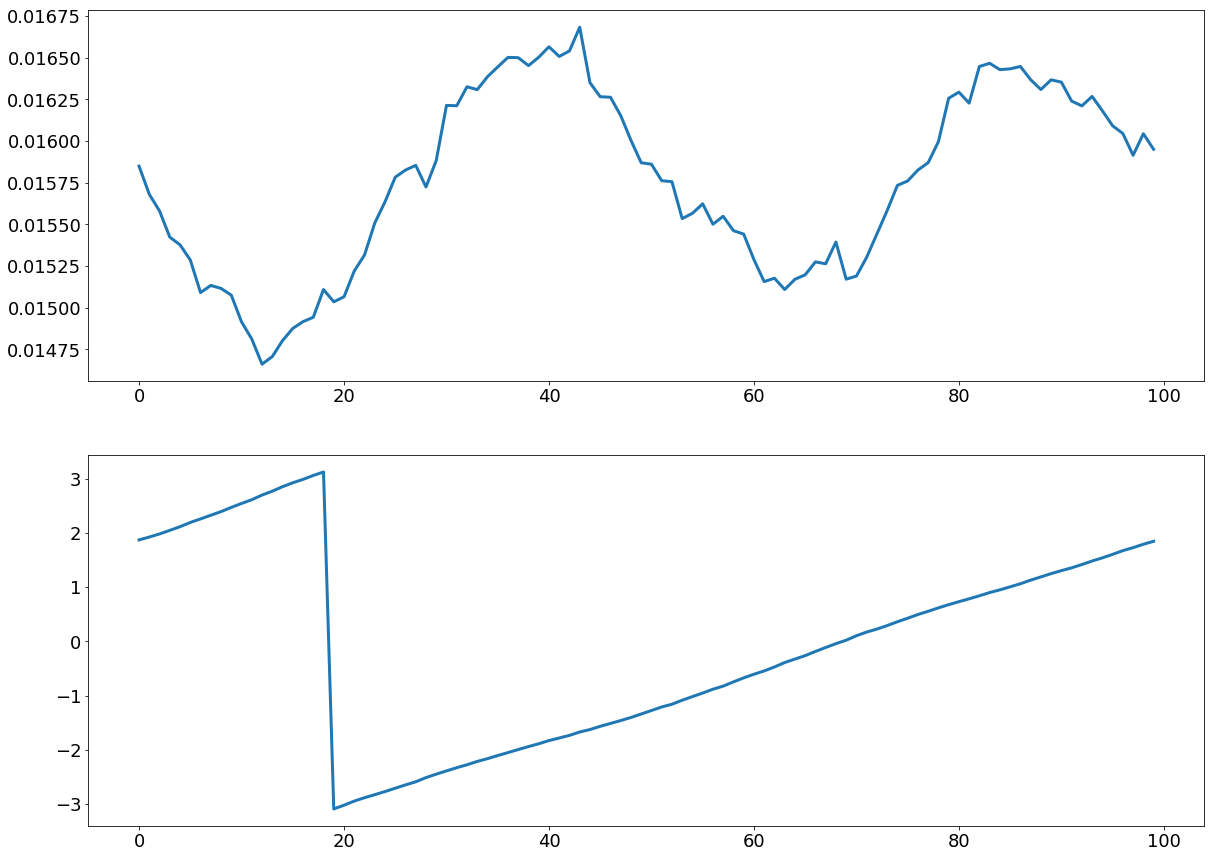

In [26]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.plot(np.abs(plt3[start:start+N]))

plt.subplot(2,1,2)
plt.plot(np.angle(plt3[start:start+N]))

plt.show()

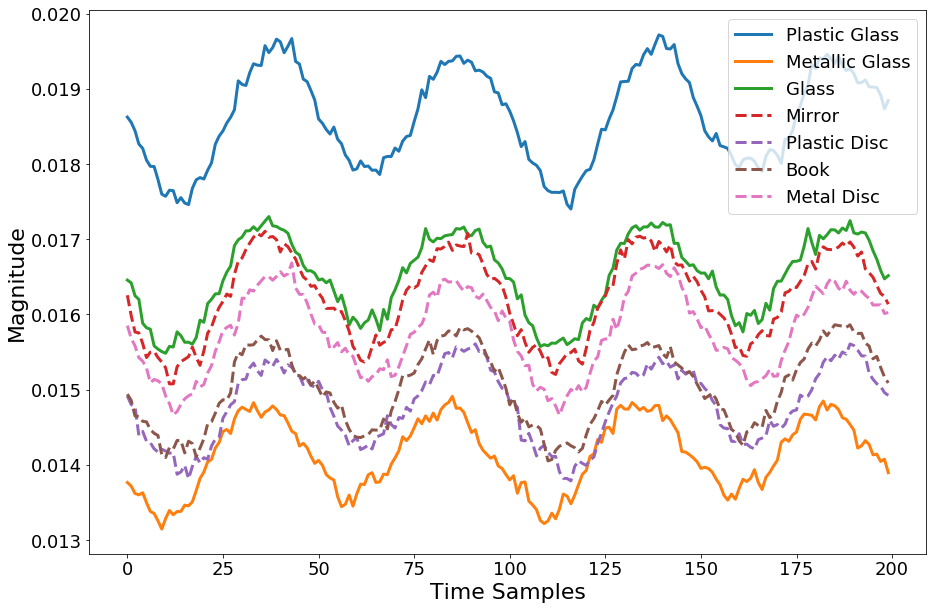

In [47]:
plt.figure(figsize=(15,10))

plt.plot(np.abs(plt1[start:start+N]), label='Plastic Glass')
plt.plot(np.abs(plt2[start:start+N]), label='Metallic Glass')
plt.plot(np.abs(plt3[start:start+N]), label ='Glass')
plt.plot(np.abs(plt4[start:start+N]),'--', label='Mirror')
plt.plot(np.abs(plt5[start:start+N]),'--', label='Plastic Disc')
plt.plot(np.abs(plt6[start:start+N]),'--', label = 'Book')
plt.plot(np.abs(plt7[start:start+N]),'--', label ='Metal Disc')


plt.legend()
plt.ylabel('Magnitude')
plt.xlabel('Time Samples')

plt.show()

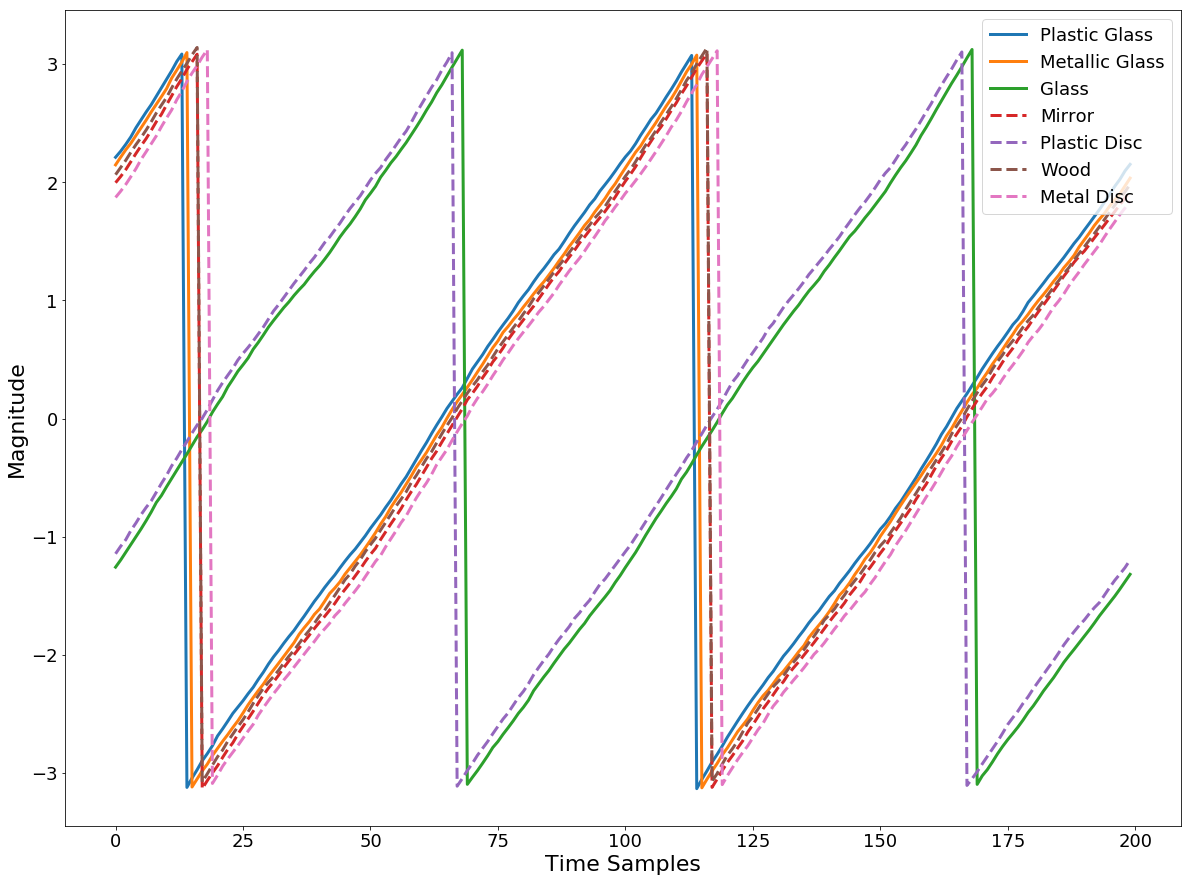

In [46]:
plt.figure(figsize=(20,15))

plt.plot(np.angle(plt1[start:start+N]), label='Plastic Glass')
plt.plot(np.angle(plt2[start:start+N]), label='Metallic Glass')
plt.plot(np.angle(plt3[start:start+N]), label ='Glass')
plt.plot(np.angle(plt4[start:start+N]),'--', label='Mirror')
plt.plot(np.angle(plt5[start:start+N]),'--', label='Plastic Disc')
plt.plot(np.angle(plt6[start:start+N]),'--', label = 'Wood')
plt.plot(np.angle(plt7[start:start+N]),'--', label ='Metal Disc')



plt.legend()
plt.ylabel('Magnitude')
plt.xlabel('Time Samples')

plt.show()

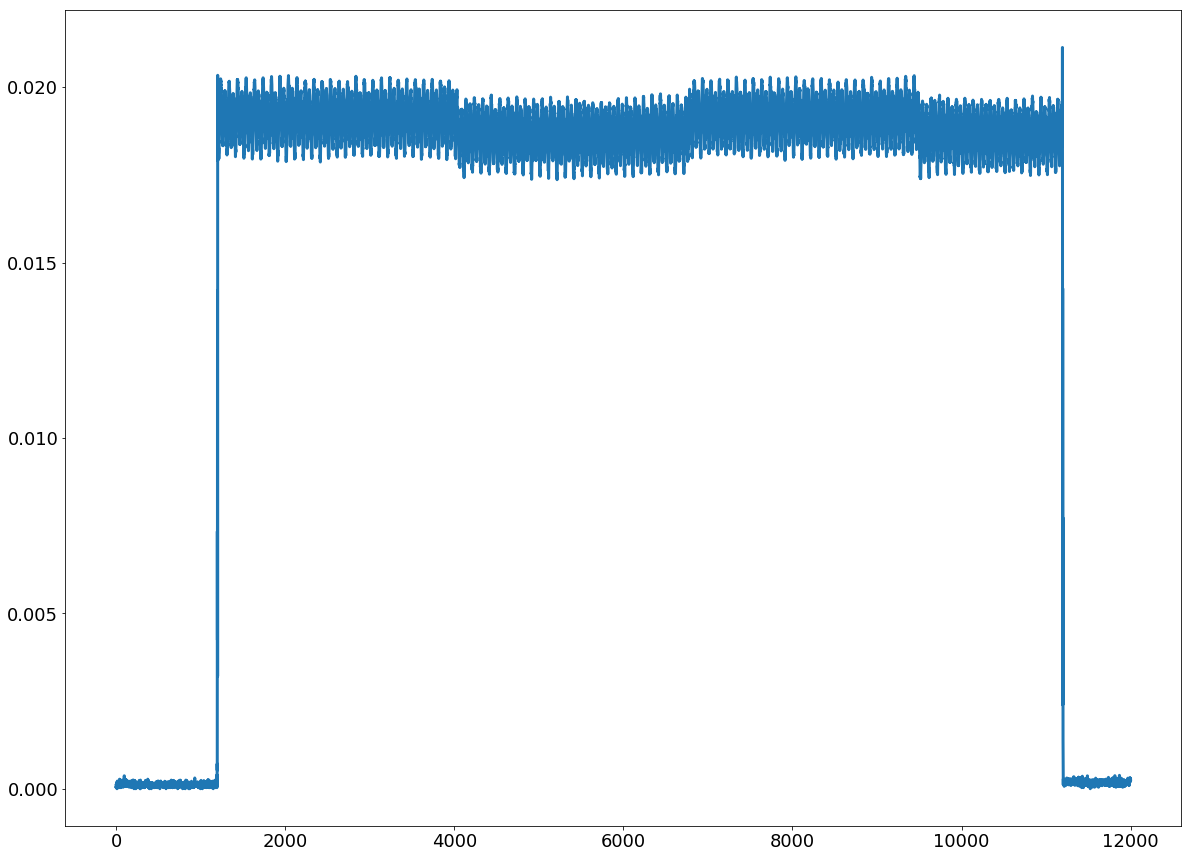

In [31]:
plt.figure(figsize=(20,15))

plt.plot(np.abs(plt1[12000:24000]))

plt.show()

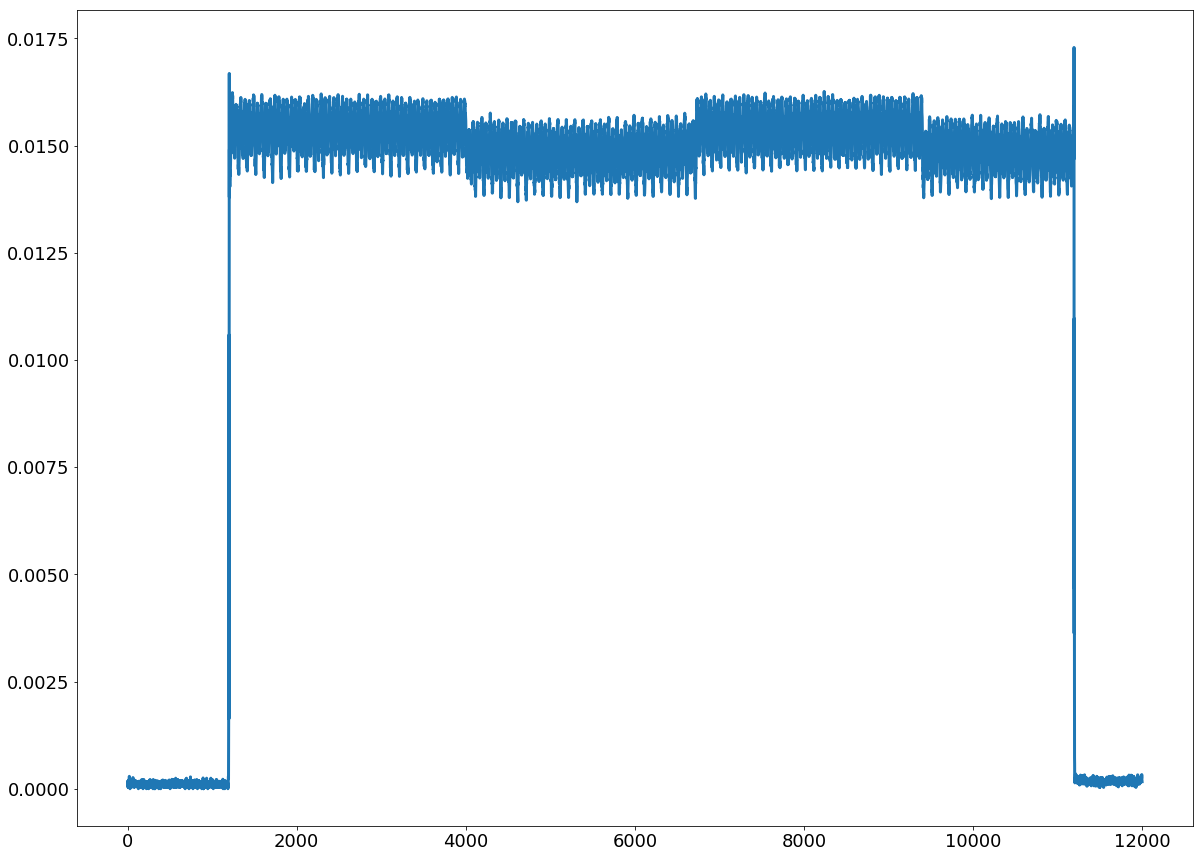

In [32]:
plt.figure(figsize=(20,15))

plt.plot(np.abs(plt2[12000:24000]))

plt.show()

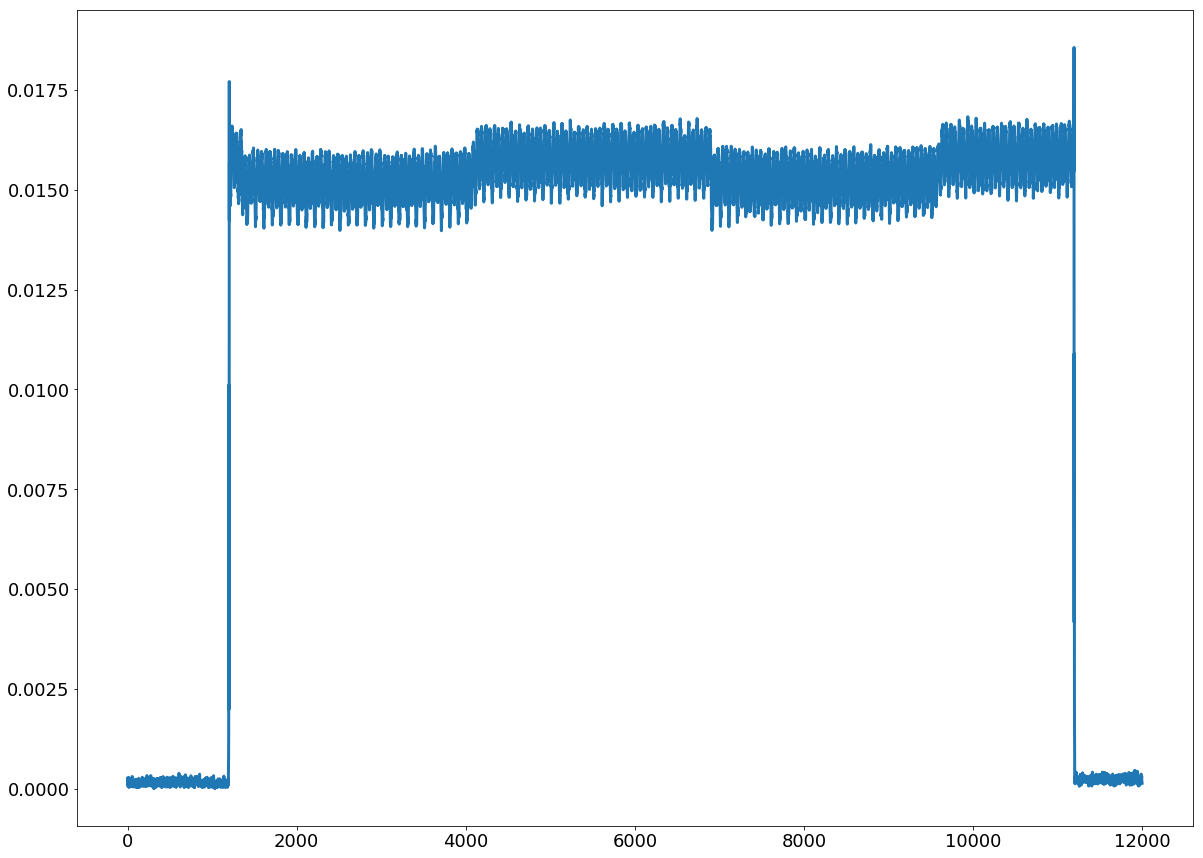

In [33]:
plt.figure(figsize=(20,15))

plt.plot(np.abs(plt3[12000:24000]))

plt.show()